In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as se
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report
%matplotlib inline

In [2]:
df=pd.read_csv('BRCA.csv')
df

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,9-Nov-18,Dead
2,TCGA-A8-A079,69,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,8-Sep-17,9-Jun-18,Alive
3,TCGA-D8-A1XR,56,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,6-May-17,27-Jun-19,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,TCGA-AN-A04A,36,FEMALE,0.231800,0.61804,-0.55779,-0.517350,III,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Simple Mastectomy,11-Nov-19,9-Feb-20,Dead
330,TCGA-A8-A085,44,MALE,0.732720,1.11170,-0.26952,-0.354920,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,1-Nov-19,4-Mar-20,Dead
331,TCGA-A1-A0SG,61,FEMALE,-0.719470,2.54850,-0.15024,0.339680,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,11-Nov-19,18-Jan-21,Dead
332,TCGA-A2-A0EU,79,FEMALE,0.479400,2.05590,-0.53136,-0.188480,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,21-Nov-19,19-Feb-21,Dead


In [3]:
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,9-Nov-18,Dead
2,TCGA-A8-A079,69,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,8-Sep-17,9-Jun-18,Alive
3,TCGA-D8-A1XR,56,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,6-May-17,27-Jun-19,Dead


In [4]:
df.tail()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
329,TCGA-AN-A04A,36,FEMALE,0.23180,0.61804,-0.55779,-0.517350,III,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Simple Mastectomy,11-Nov-19,9-Feb-20,Dead
330,TCGA-A8-A085,44,MALE,0.73272,1.11170,-0.26952,-0.354920,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,1-Nov-19,4-Mar-20,Dead
331,TCGA-A1-A0SG,61,FEMALE,-0.71947,2.54850,-0.15024,0.339680,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,11-Nov-19,18-Jan-21,Dead
332,TCGA-A2-A0EU,79,FEMALE,0.47940,2.05590,-0.53136,-0.188480,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,21-Nov-19,19-Feb-21,Dead
333,TCGA-B6-A40B,76,FEMALE,-0.24427,0.92556,-0.41823,-0.067848,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,11-Nov-19,5-Jan-21,Dead


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    int64  
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

In [6]:
df.describe()

,Age,Protein1,Protein2,Protein3,Protein4
count,334.000000,334.000000,334.000000,334.000000,334.000000
mean,58.886228,-0.029991,0.946896,-0.090204,0.009819
std,12.961212,0.563588,0.911637,0.585175,0.629055
min,29.000000,-2.340900,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.358888,0.362173,-0.513748,-0.377090
50%,58.000000,0.006129,0.992805,-0.173180,0.041768
75%,68.000000,0.343598,1.627900,0.278353,0.425630
max,90.000000,1.593600,3.402200,2.193400,1.629900


In [7]:
df.shape

(334, 16)

In [8]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Protein1', 'Protein2', 'Protein3',
       'Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status',
       'HER2 status', 'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit',
       'Patient_Status'],
      dtype='object')

In [9]:
df.isnull().sum()

Patient_ID             0
Age                    0
Gender                 0
Protein1               0
Protein2               0
Protein3               0
Protein4               0
Tumour_Stage           0
Histology              0
ER status              0
PR status              0
HER2 status            0
Surgery_type           0
Date_of_Surgery        0
Date_of_Last_Visit    17
Patient_Status        13
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.isna().sum()

Patient_ID            0
Age                   0
Gender                0
Protein1              0
Protein2              0
Protein3              0
Protein4              0
Tumour_Stage          0
Histology             0
ER status             0
PR status             0
HER2 status           0
Surgery_type          0
Date_of_Surgery       0
Date_of_Last_Visit    0
Patient_Status        0
dtype: int64

In [12]:
df.shape

(317, 16)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          317 non-null    object 
 1   Age                 317 non-null    int64  
 2   Gender              317 non-null    object 
 3   Protein1            317 non-null    float64
 4   Protein2            317 non-null    float64
 5   Protein3            317 non-null    float64
 6   Protein4            317 non-null    float64
 7   Tumour_Stage        317 non-null    object 
 8   Histology           317 non-null    object 
 9   ER status           317 non-null    object 
 10  PR status           317 non-null    object 
 11  HER2 status         317 non-null    object 
 12  Surgery_type        317 non-null    object 
 13  Date_of_Surgery     317 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      317 non-null    object 
dtypes: float

In [14]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
329    False
330    False
331    False
332    False
333    False
Length: 317, dtype: bool

In [15]:
df.drop(columns=['Date_of_Surgery', 'Date_of_Last_Visit'],inplace=True)


In [16]:
df

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status
0,TCGA-D8-A1XD,36,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,Alive
1,TCGA-EW-A1OX,43,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,Dead
2,TCGA-A8-A079,69,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Alive
3,TCGA-D8-A1XR,56,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,Alive
4,TCGA-BH-A0BF,56,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,TCGA-AN-A04A,36,FEMALE,0.231800,0.61804,-0.55779,-0.517350,III,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Simple Mastectomy,Dead
330,TCGA-A8-A085,44,MALE,0.732720,1.11170,-0.26952,-0.354920,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,Dead
331,TCGA-A1-A0SG,61,FEMALE,-0.719470,2.54850,-0.15024,0.339680,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,Dead
332,TCGA-A2-A0EU,79,FEMALE,0.479400,2.05590,-0.53136,-0.188480,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,Dead


In [17]:
df.shape

(317, 14)

In [18]:
df.dtypes

Patient_ID         object
Age                 int64
Gender             object
Protein1          float64
Protein2          float64
Protein3          float64
Protein4          float64
Tumour_Stage       object
Histology          object
ER status          object
PR status          object
HER2 status        object
Surgery_type       object
Patient_Status     object
dtype: object

In [19]:
df.dtypes

Patient_ID         object
Age                 int64
Gender             object
Protein1          float64
Protein2          float64
Protein3          float64
Protein4          float64
Tumour_Stage       object
Histology          object
ER status          object
PR status          object
HER2 status        object
Surgery_type       object
Patient_Status     object
dtype: object

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,317.0,58.725552,12.827374,29.00000,49.00000,58.000000,67.00000,90.0000
Protein1,317.0,-0.027232,0.543858,-2.14460,-0.35060,0.005649,0.33626,1.5936
Protein2,317.0,0.949557,0.906153,-0.97873,0.36884,0.997130,1.61200,3.4022
Protein3,317.0,-0.095104,0.589027,-1.62740,-0.53136,-0.193040,0.25121,2.1934
Protein4,317.0,0.006713,0.625965,-2.02550,-0.38224,0.038522,0.43625,1.6299


In [21]:
result =df[['Protein1','Protein2','Protein3','Protein4']]


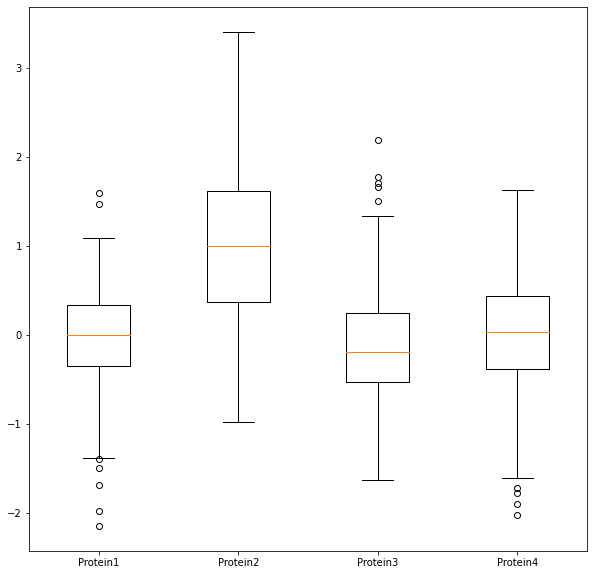

In [22]:
plt.figure(figsize=(10,10))
plt.boxplot(df[['Protein1','Protein2','Protein3','Protein4']])
plt.xticks(np.array([1,2,3,4]),['Protein1','Protein2','Protein3','Protein4'])
plt.show()

In [23]:
def detect_outliers_iqr(result):
    outlier_list = []
   
    q1 = np.percentile(result, 25)
    q3 = np.percentile(result, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
   
    for i in result:
        if (i<lwr_bound or i>upr_bound):
            outlier_list.append(i)
    return outlier_list 
for i in result:
    outliers = detect_outliers_iqr(df[i])
    print("Outliers in",i,"attribute :", outliers)

Outliers in Protein1 attribute : [-1.6828, -1.4872, -2.1446, 1.5936, -1.9711, -1.3882, 1.4704]
Outliers in Protein2 attribute : []
Outliers in Protein3 attribute : [1.7019, 1.7691, 1.6575, 2.1934, 1.507]
Outliers in Protein4 attribute : [-2.0255, -1.7684, -1.8993, -1.7127]


In [24]:
def handle_outliers(result):
    tenth_percentile = np.percentile(result, 10)
    ninetieth_percentile = np.percentile(result, 90)
    b = np.where(result<tenth_percentile, tenth_percentile, result)
    b1 = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
    return b1
for i in result:
    df[i]=handle_outliers(df[i])

In [25]:
display(df['Gender'].describe())
df['Gender'].value_counts()


count        317
unique         2
top       FEMALE
freq         313
Name: Gender, dtype: object

FEMALE    313
MALE        4
Name: Gender, dtype: int64

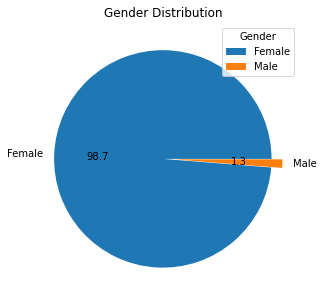

In [26]:
plt.figure(figsize=(5,5))
plt.pie(df['Gender'].value_counts(),autopct='%0.1f',explode=[0,0.1],labels=['Female','Male'])
plt.title('Gender Distribution')
plt.legend(['Female','Male'],title='Gender')
plt.show()

In [27]:
display(df['Tumour_Stage'].describe())
df['Tumour_Stage'].value_counts()

count     317
unique      3
top        II
freq      180
Name: Tumour_Stage, dtype: object

II     180
III     77
I       60
Name: Tumour_Stage, dtype: int64

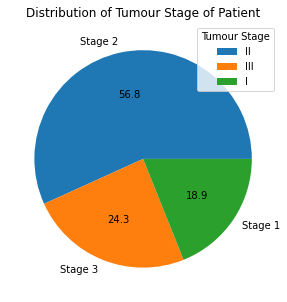

In [28]:
plt.figure(figsize=(5,5))
plt.pie(df['Tumour_Stage'].value_counts(),autopct='%0.1f',labels=['Stage 2','Stage 3','Stage 1'])
plt.title('Distribution of Tumour Stage of Patient')
plt.legend(['II','III','I'],title='Tumour Stage')
plt.show()

In [29]:
display(df['Histology'].describe())
df['Histology'].value_counts()

count                               317
unique                                3
top       Infiltrating Ductal Carcinoma
freq                                224
Name: Histology, dtype: object

Infiltrating Ductal Carcinoma     224
Infiltrating Lobular Carcinoma     81
Mucinous Carcinoma                 12
Name: Histology, dtype: int64

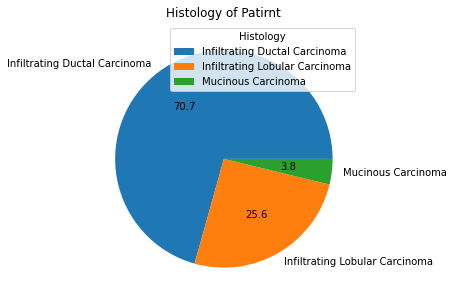

In [30]:
plt.figure(figsize=(5,5))
plt.pie(df['Histology'].value_counts(),autopct='%0.1f',labels=['Infiltrating Ductal Carcinoma','Infiltrating Lobular Carcinoma','Mucinous Carcinoma  '])
plt.title('Histology of Patirnt')
plt.legend(['Infiltrating Ductal Carcinoma','Infiltrating Lobular Carcinoma','Mucinous Carcinoma'],title='Histology')
plt.show()

In [31]:
display(df['ER status'].describe())
df['ER status'].value_counts()

count          317
unique           1
top       Positive
freq           317
Name: ER status, dtype: object

Positive    317
Name: ER status, dtype: int64

In [32]:
display(df['PR status'].describe())
df['PR status'].value_counts()

count          317
unique           1
top       Positive
freq           317
Name: PR status, dtype: object

Positive    317
Name: PR status, dtype: int64

In [33]:
display(df['HER2 status'].describe())
df['HER2 status'].value_counts()

count          317
unique           2
top       Negative
freq           288
Name: HER2 status, dtype: object

Negative    288
Positive     29
Name: HER2 status, dtype: int64

In [34]:
display(df['Surgery_type'].describe())
df['Surgery_type'].value_counts()

count       317
unique        4
top       Other
freq         97
Name: Surgery_type, dtype: object

Other                          97
Modified Radical Mastectomy    89
Lumpectomy                     66
Simple Mastectomy              65
Name: Surgery_type, dtype: int64

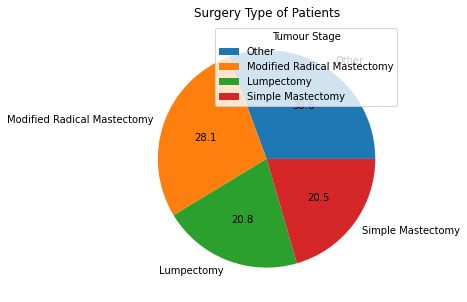

In [35]:
plt.figure(figsize=(5,5))
plt.pie(df['Surgery_type'].value_counts(),autopct='%0.1f',labels=['Other','Modified Radical Mastectomy','Lumpectomy','Simple Mastectomy'])
plt.title('Surgery Type of Patients')
plt.legend(['Other','Modified Radical Mastectomy','Lumpectomy','Simple Mastectomy'],title='Tumour Stage')
plt.show()

In [36]:
display(df['Patient_Status'].describe())
df['Patient_Status'].value_counts()

count       317
unique        2
top       Alive
freq        255
Name: Patient_Status, dtype: object

Alive    255
Dead      62
Name: Patient_Status, dtype: int64

In [37]:
table=pd.crosstab(df['Tumour_Stage'],df['Gender'])
table

Gender,FEMALE,MALE
Tumour_Stage,,
I,60,0
II,177,3
III,76,1


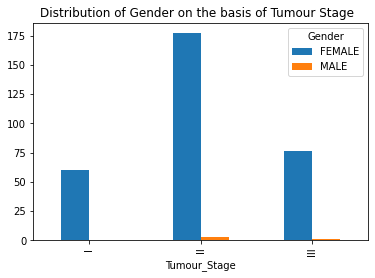

In [38]:
table.plot(kind='bar')
plt.title('Distribution of Gender on the basis of Tumour Stage  ')
plt.show()

In [39]:

table=pd.crosstab(df['Surgery_type'],df['Gender'])
table

Gender,FEMALE,MALE
Surgery_type,,
Lumpectomy,66,0
Modified Radical Mastectomy,87,2
Other,96,1
Simple Mastectomy,64,1


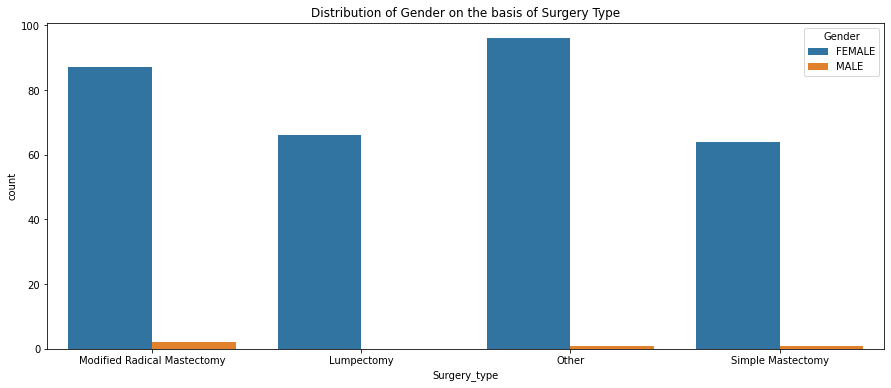

In [40]:
plt.figure(figsize=(15,6))
se.countplot(x='Surgery_type',data=df,hue='Gender')
plt.title('Distribution of Gender on the basis of Surgery Type')
plt.show()

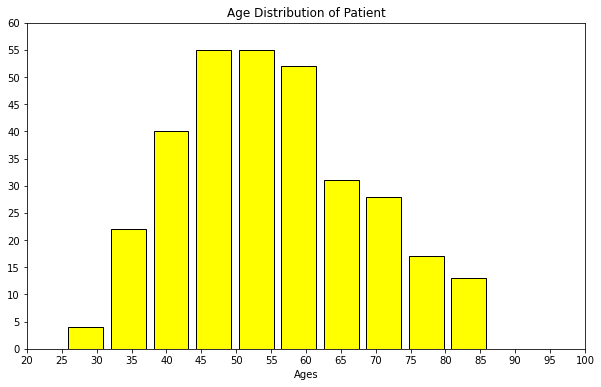

In [41]:
plt.figure(figsize=(10,6))
plt.hist(x='Age',data=df,width=5,color='Yellow',edgecolor='Black',align='left')
plt.title('Age Distribution of Patient')
plt.xlabel('Ages')
plt.xticks(np.arange(20,105,5))
plt.yticks(np.arange(0,65,5))
plt.show()

In [42]:
table=pd.crosstab(df['Patient_Status'],df['Gender'])
table

Gender,FEMALE,MALE
Patient_Status,,
Alive,252,3
Dead,61,1


In [43]:
table=pd.crosstab(df['Gender'],df['Histology'])
table

Histology,Infiltrating Ductal Carcinoma,Infiltrating Lobular Carcinoma,Mucinous Carcinoma
Gender,,,
FEMALE,222,79,12
MALE,2,2,0


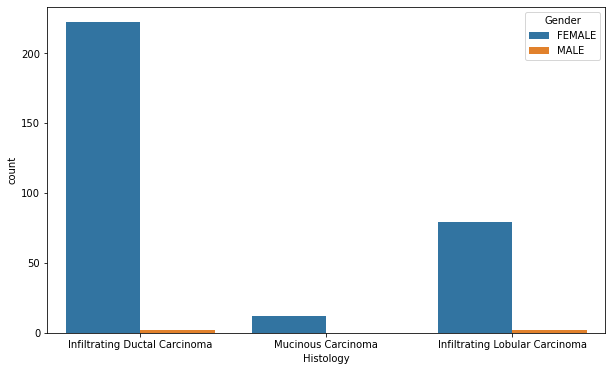

In [44]:
plt.figure(figsize=(10,6))
se.countplot(x='Histology',data=df,hue='Gender')
plt.show()

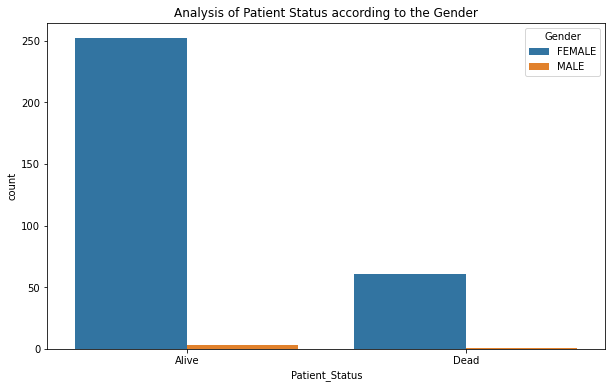

In [45]:
plt.figure(figsize=(10,6))
se.countplot(x='Patient_Status',data=df,hue='Gender')
plt.title('Analysis of Patient Status according to the Gender')
plt.show()

In [46]:
table=pd.crosstab(df['Patient_Status'],df['Surgery_type'])
table

Surgery_type,Lumpectomy,Modified Radical Mastectomy,Other,Simple Mastectomy
Patient_Status,,,,
Alive,57,72,73,53
Dead,9,17,24,12


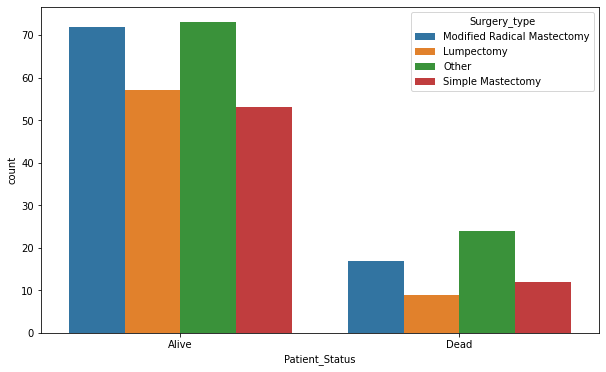

In [47]:
plt.figure(figsize=(10,6))
se.countplot(x='Patient_Status',data=df,hue='Surgery_type')
plt.show()

In [48]:
table=pd.crosstab(df['Patient_Status'],df['Tumour_Stage'])
table

Tumour_Stage,I,II,III
Patient_Status,,,
Alive,51,144,60
Dead,9,36,17


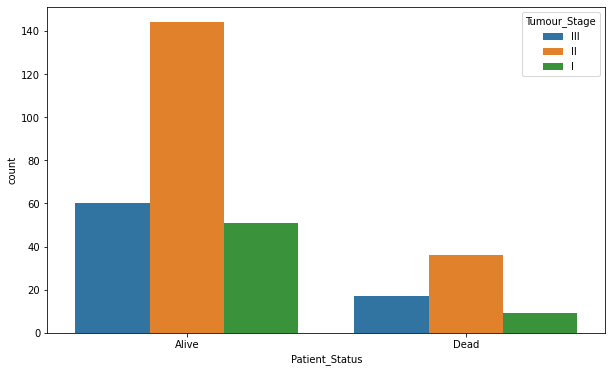

In [49]:
plt.figure(figsize=(10,6))
se.countplot(x='Patient_Status',data=df,hue='Tumour_Stage')
plt.show()

In [50]:
table=pd.crosstab(df['Patient_Status'],df['Histology'])
table

Histology,Infiltrating Ductal Carcinoma,Infiltrating Lobular Carcinoma,Mucinous Carcinoma
Patient_Status,,,
Alive,179,67,9
Dead,45,14,3


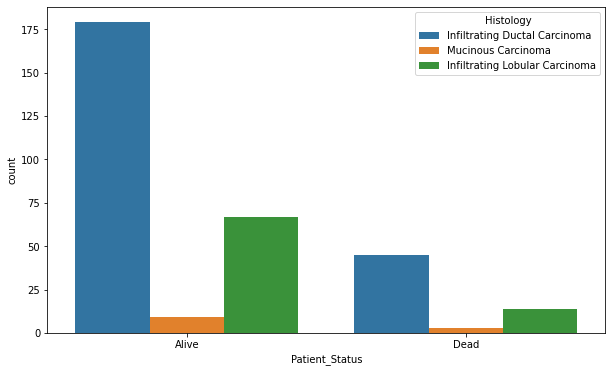

In [51]:
plt.figure(figsize=(10,6))
se.countplot(x='Patient_Status',data=df,hue='Histology')
plt.show()

In [52]:
df['Tumour_Stage']=df['Tumour_Stage'].map({'I':1,'II':2,'III':3})
df['Histology']=df['Histology'].map({'Infiltrating Ductal Carcinoma':1,'Infiltrating Lobular Carcinoma':2,'Mucinous Carcinoma':3,})
df['ER status']=df['ER status'].map({'Positive':1})
df['PR status']=df['PR status'].map({'Positive':1})
df['HER2 status']=df['HER2 status'].map({'Positive':1,'Negative':2})
df['Gender']=df['Gender'].map({'MALE':1,'FEMALE':2})
df['Surgery_type']=df['Surgery_type'].map({'Other':1,'Modified Radical Mastectomy':2,'Lumpectomy':3,'Simple Mastectomy':4})
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status
0,TCGA-D8-A1XD,36,2,0.080353,0.42638,0.54715,0.273680,3,1,1,1,2,2,Alive
1,TCGA-EW-A1OX,43,2,-0.420320,0.57807,0.61447,-0.031505,2,3,1,1,2,3,Dead
2,TCGA-A8-A079,69,2,0.213980,1.31140,-0.32747,-0.234260,3,1,1,1,2,1,Alive
3,TCGA-D8-A1XR,56,2,0.345090,-0.21147,-0.19304,0.124270,2,1,1,1,2,2,Alive
4,TCGA-BH-A0BF,56,2,0.221550,1.90680,0.52045,-0.311990,2,1,1,1,2,1,Dead


In [53]:
x=df[["Age","Gender","Protein1","Protein2","Protein3","Protein4","Tumour_Stage","Histology","ER status","PR status","HER2 status","Surgery_type"]]
y=df["Patient_Status"]

y

0      Alive
1       Dead
2      Alive
3      Alive
4       Dead
       ...  
329     Dead
330     Dead
331     Dead
332     Dead
333     Dead
Name: Patient_Status, Length: 317, dtype: object

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("Size of training set:", X_train.shape)
print("Size of Testing set:", X_test.shape)

Size of training set: (253, 12)
Size of Testing set: (64, 12)


In [55]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression() 
logreg.fit(X_train, y_train)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
y_pred0 = logreg.predict(X_test)
c_matrix= confusion_matrix(y_test, y_pred0)
print('Confusion matrix:\n',c_matrix)

Confusion matrix:
 [[53  0]
 [11  0]]


In [58]:
acc_logreg = round( metrics.accuracy_score(y_test, y_pred0) * 100, 2 )
print( 'Accuracy of Logistic Regression model : ', acc_logreg )
print(classification_report(y_test,y_pred0))

Accuracy of Logistic Regression model :  82.81
              precision    recall  f1-score   support

       Alive       0.83      1.00      0.91        53
        Dead       0.00      0.00      0.00        11

    accuracy                           0.83        64
   macro avg       0.41      0.50      0.45        64
weighted avg       0.69      0.83      0.75        64



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
# Creating scaled set to be used in model to improve the results 
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# Import Library of Support Vector Machine model 
from sklearn import svm 
# Create a Support Vector Classifier 
svc = svm.SVC()
# Hyperparameter Optimization 
parameters = [
{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},]
# Run the grid search 
grid_obj = GridSearchCV(svc, parameters) 
grid_obj = grid_obj.fit(X_train, y_train)
# Set the svc to the best combination of parameters
svc = grid_obj.best_estimator_ 
# Train the model using the training sets svc.fit(X_train,y_train)


In [60]:
svc.fit(X_train,y_train)

SVC(C=1, kernel='linear')

In [61]:
y_pred2=svc.predict(X_test)
c_matrix= confusion_matrix(y_test, y_pred2)
print('Confusion matrix:\n',c_matrix)
acc_svm=round(metrics.accuracy_score(y_test,y_pred2)*100,2)
print( 'Accuracy of Support Vector Machine model : ', acc_svm )
print(classification_report(y_test,y_pred2))

Confusion matrix:
 [[53  0]
 [11  0]]
Accuracy of Support Vector Machine model :  82.81
              precision    recall  f1-score   support

       Alive       0.83      1.00      0.91        53
        Dead       0.00      0.00      0.00        11

    accuracy                           0.83        64
   macro avg       0.41      0.50      0.45        64
weighted avg       0.69      0.83      0.75        64



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

SVC()

In [63]:
y_pred2=model.predict(X_test)
c_matrix= confusion_matrix(y_test, y_pred2)
print('Confusion matrix:\n',c_matrix)
acc_svm=round(metrics.accuracy_score(y_test,y_pred)*100,2)
print( 'Accuracy of Support Vector Machine model : ', acc_svm )
print(classification_report(y_test,y_pred2))

Confusion matrix:
 [[53  0]
 [11  0]]


NameError: name 'y_pred' is not defined

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB() 
model.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred3 = model.predict(X_test)
c_matrix= confusion_matrix(y_test, y_pred3)
print('Confusion matrix:\n',c_matrix)
acc_nb = round( metrics.accuracy_score(y_test, y_pred3) * 100, 2 )
print( 'Accuracy of Gaussian Naive Bayes model : ', acc_nb )
print(classification_report(y_test,y_pred3))

Confusion matrix:
 [[53  0]
 [11  0]]
Accuracy of Gaussian Naive Bayes model :  82.81
              precision    recall  f1-score   support

       Alive       0.83      1.00      0.91        53
        Dead       0.00      0.00      0.00        11

    accuracy                           0.83        64
   macro avg       0.41      0.50      0.45        64
weighted avg       0.69      0.83      0.75        64



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Decision Tree Classifier

# Import Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Create a Decision tree classifier model
clf = DecisionTreeClassifier()

# Hyperparameter Optimization
parameters = {'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10, 50], 
              'min_samples_split': [2, 3, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10]
             }

# Run the grid search
grid_obj = GridSearchCV(clf, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Train the model using the training sets 
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       min_samples_leaf=8, min_samples_split=3)

In [ ]:
# Prediction on test set
y_pred4 = clf.predict(X_test)
c_matrix= confusion_matrix(y_test, y_pred4)
print('Confusion matrix:\n',c_matrix)
acc_dt = round( metrics.accuracy_score(y_test, y_pred4) * 100, 2 )
print( 'Accuracy of Decision Tree model : ', acc_dt )
print(classification_report(y_test,y_pred4))


Confusion matrix:
 [[52  1]
 [11  0]]
Accuracy of Decision Tree model :  81.25
              precision    recall  f1-score   support

       Alive       0.83      0.98      0.90        53
        Dead       0.00      0.00      0.00        11

    accuracy                           0.81        64
   macro avg       0.41      0.49      0.45        64
weighted avg       0.68      0.81      0.74        64



In [ ]:
# Random Forest Classifier

# Import library of RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf = RandomForestClassifier()

# Hyperparameter Optimization
parameters = {'n_estimators': [4, 6, 9, 10, 15], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
             }

# Run the grid search
grid_obj = GridSearchCV(rf, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the rf to the best combination of parameters
rf = grid_obj.best_estimator_

# Train the model using the training sets 
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, max_features='log2', min_samples_split=3,
                       n_estimators=6)

In [ ]:
# Prediction on test data
y_pred5 = rf.predict(X_test)
c_matrix= confusion_matrix(y_test, y_pred5)
print('Confusion matrix:\n',c_matrix)
acc_rf = round( metrics.accuracy_score(y_test, y_pred5) * 100 , 2 )
print( 'Accuracy of Random Forest model : ', acc_rf )
print(classification_report(y_test,y_pred5))

Confusion matrix:
 [[53  0]
 [11  0]]
Accuracy of Random Forest model :  82.81
              precision    recall  f1-score   support

       Alive       0.83      1.00      0.91        53
        Dead       0.00      0.00      0.00        11

    accuracy                           0.83        64
   macro avg       0.41      0.50      0.45        64
weighted avg       0.69      0.83      0.75        64



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# K - Nearest Neighbors

# Import library of KNeighborsClassifier model
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN Classifier
knn = KNeighborsClassifier()

# Hyperparameter Optimization
parameters = {'n_neighbors': [3, 4, 5, 10], 
              'weights': ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size' : [10, 20, 30, 50]
             }

# Run the grid search
grid_obj = GridSearchCV(knn, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the knn to the best combination of parameters
knn = grid_obj.best_estimator_

# Train the model using the training sets 
knn.fit(X_train,y_train)

KNeighborsClassifier(leaf_size=10, n_neighbors=10)

In [ ]:
# Prediction on test data
y_pred = knn.predict(X_test)
c_matrix= confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n',c_matrix)
acc_knn = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of KNN model : ', acc_knn )
print(classification_report(y_test,y_p))

Confusion matrix:
 [[53  0]
 [11  0]]
Accuracy of KNN model :  82.81
              precision    recall  f1-score   support

       Alive       0.83      1.00      0.91        53
        Dead       0.00      0.00      0.00        11

    accuracy                           0.83        64
   macro avg       0.41      0.50      0.45        64
weighted avg       0.69      0.83      0.75        64



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors'],
    'Accuracy': [acc_logreg, acc_nb, acc_dt, acc_rf, acc_svm, acc_knn],})
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,Logistic Regression,82.81
1,Naive Bayes,82.81
3,Random Forest,82.81
4,Support Vector Machines,82.81
5,K - Nearest Neighbors,82.81
2,Decision Tree,81.25


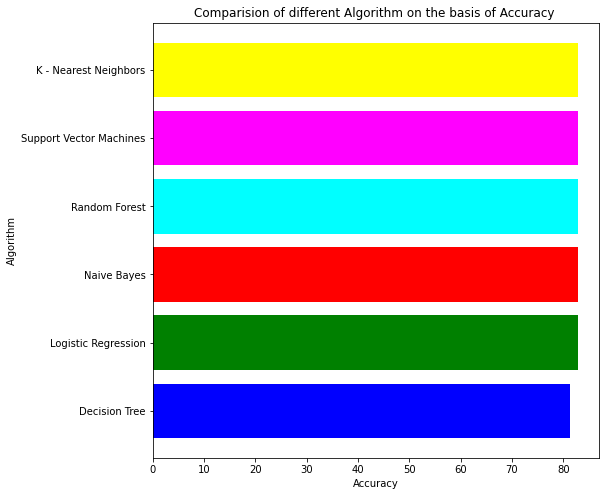

In [ ]:
m=models.sort_values(by='Accuracy', ascending=True)
plt.figure(figsize=(8,8))
plt.barh(m['Model'],m['Accuracy'],color=['blue','green','red','cyan','magenta','yellow'])
plt.title('Comparision of different Algorithm on the basis of Accuracy ')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
plt.show()
